### SVM


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import load_wine

%matplotlib inline
sns.set()

In [45]:
def plot_classifier(x, y, clf):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 5))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.yticks()
    plt.show()

<ipython-input-45-044a4dda51a3>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
<ipython-input-45-044a4dda51a3>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


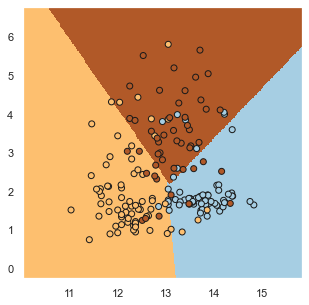

Number of original examples: 178
Number of support vectors: 81
Number of original examples: 81
Number of support vectors: 81


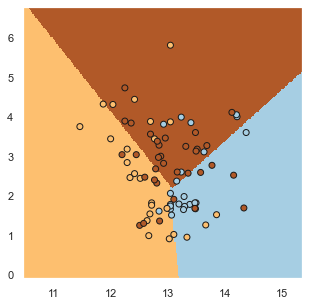

In [46]:
X, y = load_wine(return_X_y=True)
X = X[:, :2]

svm = SVC(kernel='linear').fit(X, y)
plot_classifier(X, y, svm)
# results
print(f'Number of original examples: {len(X)}')
print(f'Number of support vectors: {len(svm.support_)}')

# smaller dataset
X_small = X[svm.support_]
y_small = y[svm.support_]
svm = SVC(kernel='linear').fit(X_small, y_small)
plot_classifier(X_small, y_small, svm)

print(f'Number of original examples: {len(X_small)}')
print(f'Number of support vectors: {len(svm.support_)}')

### Kernel SVM

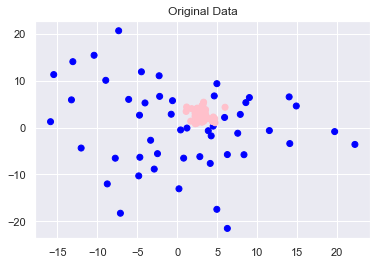

In [50]:
class1 = pd.DataFrame({'x': np.random.normal(scale=10, size=50),
                       'x2': np.random.normal(scale=10, size=50),
                       'class': [0]*50})

class2 = pd.DataFrame({'x': np.random.normal(loc=3.0, scale=1, size=50),
                       'x2': np.random.normal(loc=3.0, scale=1, size=50),
                       'class': [1]*50})

df = pd.concat([class1, class2], ignore_index=True)
colors = ['blue' if x == 0 else 'pink' for x in df['class']]
plt.title('Original Data')
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=colors)
plt.show()

<ipython-input-45-044a4dda51a3>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


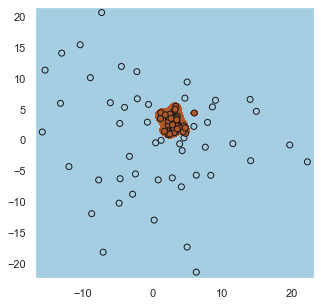

In [51]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
svm = SVC(gamma=1).fit(X, y)
plot_classifier(X, y, svm)
# svm.support_

<ipython-input-45-044a4dda51a3>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


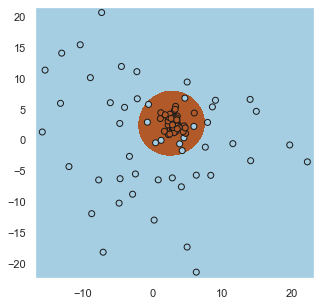

In [52]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
svm = SVC(gamma=0.01).fit(X, y)
plot_classifier(X, y, svm)

In [54]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)


Best CV params {'gamma': 0.1}


In [61]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=35)


# tuning gamma and C with GridSearchCV
svm = SVC()
parameters = {'C': [0.01, 0.1, 1, 10], 'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
searcher = GridSearchCV(svm, param_grid=parameters).fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.0001}
Best CV accuracy 0.8048433048433049
Test accuracy of best grid search hypers: 0.6444444444444445


In [65]:
# We set random_state=0 for reproducibility
linear_classifier = SGDClassifier(random_state=0, max_iter=1e5)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
Best CV accuracy 0.7373626373626374
Test accuracy of best grid search hypers: 0.5777777777777777
